In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pickle

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prathamesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
df = pd.read_csv('../data/resumes.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


Total records: 962
Unique Categories: 25


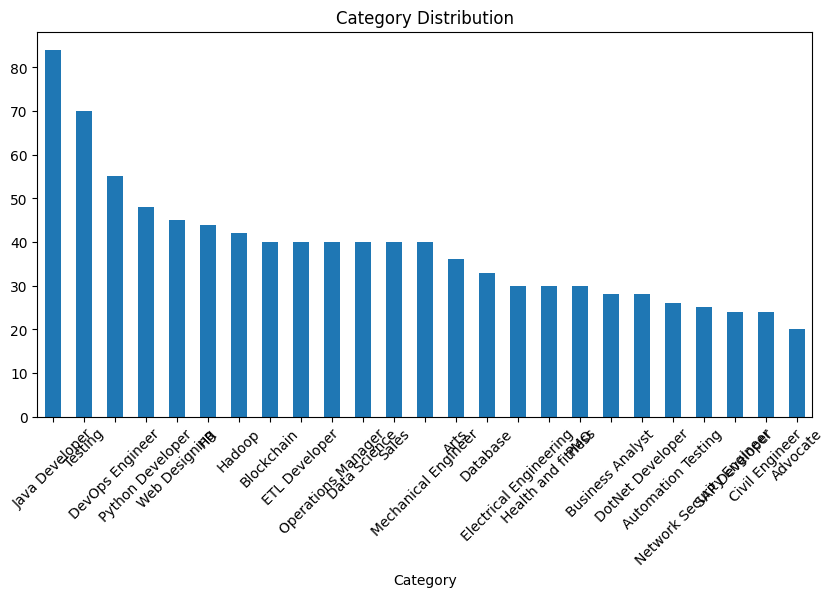

In [4]:
print(f"Total records: {len(df)}")
print("Unique Categories:", df['Category'].nunique())
df['Category'].value_counts().plot(kind='bar', figsize=(10,5), title="Category Distribution")
plt.xticks(rotation=45)
plt.show()

In [5]:
def clean_text(text):
    text = re.sub(r'<[^>]+>', ' ', text)           # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)         # keep only letters
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['cleaned'] = df['Resume'].apply(clean_text)
df[['Resume', 'cleaned']].head()

,Resume,cleaned
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...
2,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])

# Save the encoder
with open("../training/app/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [11]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned'])
y = df['label']

# Save vectorizer
with open("../training/app/vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model
with open("../training/app/model.pkl", "wb") as f:
    pickle.dump(model, f)

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9948186528497409

Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
       